### Example 1: Convert to SBML with antimony  

In [1]:
import antimony 

ant_model_1 = """
model NFB

    v1: S1 -> pS1; k1*S1*K1^n1/(K1^n1+pS3^n1);
    v2: pS1 -> S1; k2*pS1;
    v3: S2 -> pS2; k3*S2*pS1;
    v4: pS2 -> S2; k4*pS2;
    v5: S3 -> pS3; k5*S3*pS2;
    v6: pS3 -> S3; k6*S3;

    S1=0
    S2=0
    S3=0

    S1t = 50 
    S2t = 50 
    S3t = 50 

    k1 = 0.001
    k2 = 0.01
    k3 = 0.001
    k4 = 0.01
    k5 = 0.001
    k6 = 0.01
    n1=3
    K1=10
end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model_1)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    print(sbml_model)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by libAntimony version v2.13.2 with libSBML version 5.19.5. -->
<sbml xmlns="http://www.sbml.org/sbml/level3/version1/core" level="3" version="1">
  <model metaid="NFB" id="NFB">
    <listOfCompartments>
      <compartment sboTerm="SBO:0000410" id="default_compartment" spatialDimensions="3" size="1" constant="true"/>
    </listOfCompartments>
    <listOfSpecies>
      <species id="S1" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="pS1" compartment="default_compartment" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="pS3" compartment="default_compartment" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
      <species id="S2" compartment="default_compartment" initialConcentration="0" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
   

### Example 2: Simulate model using Tellurium

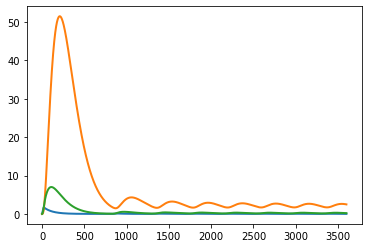

In [2]:
import antimony 

# Example 1 - The Goodwin System 

ant_model = """
model NFB

    React1:    -> S1; k1*K1^n1/(K1^n1+S3^n1);
    React2: S1 ->   ; kd1*S1;
    React3:    -> S2; k2*S1;
    React4: S2 ->   ; kd2*S2;
    React5:    -> S3; k3*S2;
    React6: S3 ->   ; kd3*S3;

    

    S1=0
    S2=0
    S3=0

    k1=0.1
    k2=0.1
    k3=0.1
    kd1=0.01
    kd2=0.01
    kd3=0.01
    n1=9
    K1=1
end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)
    # print(sbml_model)

    # with open('output_sbml.xml', 'w') as f:
    #     f.write(sbml_model)
import tellurium as te

rr = te.loada(ant_model)

rr.integrator = 'cvode'
rr.integrator.absolute_tolerance = 5e-10
rr.integrator.relative_tolerance = 1e-3
rr.integrator.initial_time_step = 0.00001

result = rr.simulate(0, 3600, 3600) 


te.plotArray(result)
# print(rr.steadyStateSolvers)
# print(rr.integrators)

### Example 3: Direct simulation using libroadrunner 

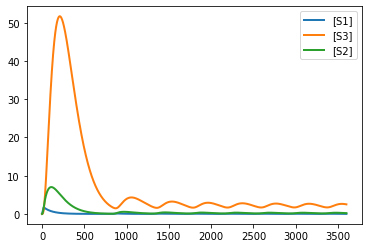

In [3]:
import roadrunner 
import matplotlib.pyplot as plt 

ant_model = """
model NFB

    React1:    -> S1; k1*K1^n1/(K1^n1+S3^n1);
    React2: S1 ->   ; kd1*S1;
    React3:    -> S2; k2*S1;
    React4: S2 ->   ; kd2*S2;
    React5:    -> S3; k3*S2;
    React6: S3 ->   ; kd3*S3;

    

    S1=0
    S2=0
    S3=0

    k1=0.1
    k2=0.1
    k3=0.1
    kd1=0.01
    kd2=0.01
    kd3=0.01
    n1=9
    K1=1
end
"""

antimony.clearPreviousLoads()
antimony.freeAll()
code = antimony.loadAntimonyString(ant_model)
if code >= 0:
    mid = antimony.getMainModuleName()
    sbml_model = antimony.getSBMLString(mid)

r_model = roadrunner.RoadRunner(sbml_model)

r_solved = r_model.simulate(0, 3600, 3600)

r_model.plot()

# print(r_solved)
# plt.plot(r_solved)
